In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import matplotlib
sid_obj  = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ZQ\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
stockdata = pd.read_csv("upload_DJIA_table.csv")
stockdata

Date          Open          High           Low         Close  \
0     2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1     2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2     2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3     2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4     2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
...          ...           ...           ...           ...           ...   
1984  2008-08-14  11532.070312  11718.280273  11450.889648  11615.929688   
1985  2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   
1986  2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
1987  2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   
1988  2008-08-08  11432.089844  11759.959961  11388.040039  11734.320312   

         Volume     Adj Close  
0      82160000  17949.369141  
1     133030000  17929.990234  
2     106380000  17694.679688  
3     112190000  17409.720703  
4     138740000  17140.240234  
...         ...           ...  
1984  159790000  11615.929688  
1985  182550000  11532.959961  
1986  173590000  11642.469727  
1987  183190000  11782.349609  
1988  212830000  11734.320312  

[1989 rows x 7 columns]

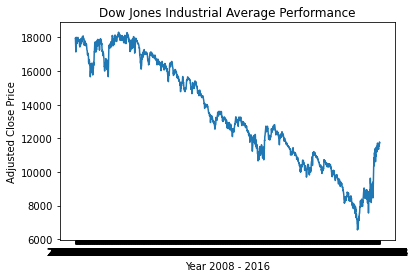

In [3]:
plt.plot( 'Date', 'Adj Close', data=stockdata)
plt.title('Dow Jones Industrial Average Performance')
plt.xlabel('Year 2008 - 2016')
plt.ylabel('Adjusted Close Price')

plt.show()

In [4]:
newsdata = pd.read_csv('RedditNews.csv')
newsdata = newsdata.replace('b\"|b\'|\\\\|\\\"', '', regex=True)
newsdata

Date                                               News
0      2016-07-01  A 117-year-old woman in Mexico City finally re...
1      2016-07-01   IMF chief backs Athens as permanent Olympic host
2      2016-07-01  The president of France says if Brexit won, so...
3      2016-07-01  British Man Who Must Give Police 24 Hours' Not...
4      2016-07-01  100+ Nobel laureates urge Greenpeace to stop o...
...           ...                                                ...
73603  2008-06-08  Man goes berzerk in Akihabara and stabs everyo...
73604  2008-06-08  Threat of world AIDS pandemic among heterosexu...
73605  2008-06-08  Angst in Ankara: Turkey Steers into a Dangerou...
73606  2008-06-08  UK: Identity cards 'could be used to spy on pe...
73607  2008-06-08  Marriage, they said, was reduced to the status...

[73608 rows x 2 columns]

Text(0, 0.5, 'Count')

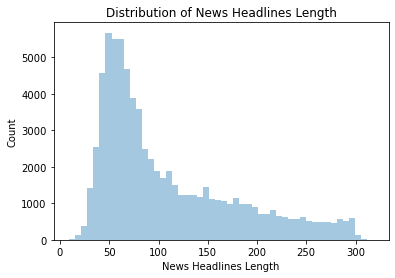

In [5]:
#avr news length
news_len = []
for i in range(len(newsdata)):
    news_len.append(len(newsdata['News'].iloc[i]))
    
sns.distplot(news_len, kde=False)
plt.title('Distribution of News Headlines Length')
plt.xlabel('News Headlines Length')
plt.ylabel('Count')

In [6]:
newsdata2 = newsdata.groupby(['Date'])['News'].apply(' '.join).reset_index()

In [7]:
newsdata2

Date                                               News
0     2008-06-08  Nim Chimpsky: The tragedy of the chimp who tho...
1     2008-06-09  United States quits Human Rights Council' Pent...
2     2008-06-10  Oil shortage a myth, says industry insider' Is...
3     2008-06-11  BBC uncovers lost Iraq billions' War Criminal ...
4     2008-06-12  Did US attack Pakistan last night? Pakistan fu...
...          ...                                                ...
2938  2016-06-27  Barclays and RBS shares suspended from trading...
2939  2016-06-28  2,500 Scientists To Australia: If You Want To ...
2940  2016-06-29  Explosion At Airport In Istanbul Yemeni former...
2941  2016-06-30  Jamaica proposes marijuana dispensers for tour...
2942  2016-07-01  A 117-year-old woman in Mexico City finally re...

[2943 rows x 2 columns]

Text(0, 0.5, 'Count')

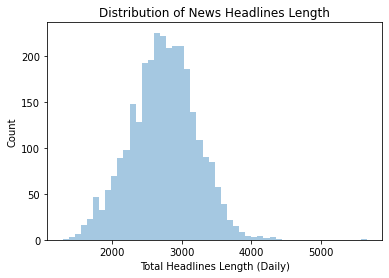

In [8]:
#daily basis
news_len = []
for i in range(len(newsdata2)):
    news_len.append(len(newsdata2['News'].iloc[i]))
    
sns.distplot(news_len, kde=False)
plt.title('Distribution of News Headlines Length')
plt.xlabel('Total Headlines Length (Daily)')
plt.ylabel('Count')

In [9]:
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("Sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("Sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("Sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral") 

In [10]:
sentiment = []
for i in range(len(newsdata2['News'])):
    sentiment_dict = sid_obj.polarity_scores(newsdata2.iloc[i]['News'])
    if sentiment_dict['compound'] >= 0.05 : 
            sentiment.append("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
            sentiment.append("Negative") 
  
    else : 
            sentiment.append("Neutral") 
            
newsdata2['Sentiment'] = sentiment

Text(0, 0.5, 'Daily News Count')

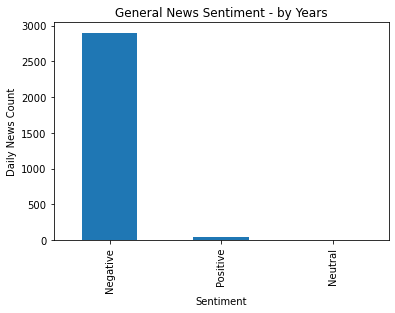

In [74]:
newsdata2['Sentiment'].value_counts().plot(kind='bar')
plt.title('General News Sentiment - by Years')
plt.xlabel('Sentiment')
plt.ylabel('Daily News Count')

In [12]:
sentiment2 = []
for i in range(len(newsdata['News'])):
    sentiment_dict = sid_obj.polarity_scores(newsdata.iloc[i]['News'])
    if sentiment_dict['compound'] >= 0.05 : 
            sentiment2.append("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
            sentiment2.append("Negative") 
  
    else : 
            sentiment2.append("Neutral") 
            
newsdata['Sentiment'] = sentiment2

In [13]:
newsdata

Date                                               News Sentiment
0      2016-07-01  A 117-year-old woman in Mexico City finally re...  Negative
1      2016-07-01   IMF chief backs Athens as permanent Olympic host  Negative
2      2016-07-01  The president of France says if Brexit won, so...  Positive
3      2016-07-01  British Man Who Must Give Police 24 Hours' Not...  Negative
4      2016-07-01  100+ Nobel laureates urge Greenpeace to stop o...  Negative
...           ...                                                ...       ...
73603  2008-06-08  Man goes berzerk in Akihabara and stabs everyo...  Negative
73604  2008-06-08  Threat of world AIDS pandemic among heterosexu...  Negative
73605  2008-06-08  Angst in Ankara: Turkey Steers into a Dangerou...  Negative
73606  2008-06-08  UK: Identity cards 'could be used to spy on pe...  Negative
73607  2008-06-08  Marriage, they said, was reduced to the status...  Negative

[73608 rows x 3 columns]

In [14]:
test = newsdata.groupby(['Date','Sentiment']).size()
test.to_csv("testingdata.csv")

In [15]:
sid_obj.polarity_scores(newsdata.iloc[0]['News'])

{'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compound': -0.5574}

In [16]:
newsdata.iloc[1]['News']

'IMF chief backs Athens as permanent Olympic host'

In [17]:
# "1" when DJIA Adj Close value rose or stayed the same; "0" when DJIA Adj Close value decreased.

diffs = stockdata["Adj Close"].diff()
stockdata = stockdata.assign(
    label=np.where(
        diffs >= 0, 1, 0))

Text(0, 0.5, 'Count')

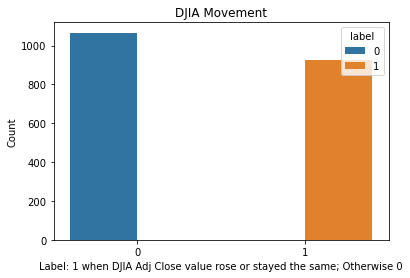

In [18]:
sns.countplot(x='label', hue='label', data=stockdata)
plt.title("DJIA Movement")
plt.xlabel("Label: 1 when DJIA Adj Close value rose or stayed the same; Otherwise 0")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

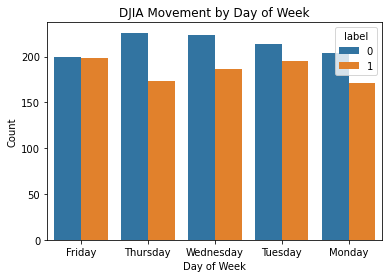

In [19]:
stockdata['Date'] = pd.to_datetime(stockdata['Date'], errors='coerce')
stockdata['day_of_week'] = stockdata['Date'].dt.day_name()

sns.countplot(x="day_of_week", hue="label", data=stockdata)
plt.title("DJIA Movement by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")

In [20]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [21]:
def clean_text(text, remove_stopwords = True):
    
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'0,0', '00', text) 
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\$', ' $ ', text)
    text = re.sub(r'u s ', ' united states ', text)
    text = re.sub(r'u n ', ' united nations ', text)
    text = re.sub(r'u k ', ' united kingdom ', text)
    text = re.sub(r'j k ', ' jk ', text)
    text = re.sub(r' s ', ' ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r' l g b t ', ' lgbt ', text)
    text = re.sub(r'0km ', '0 km ', text)

    # Remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
    return text

In [22]:
# without stopwords removed
cleanheadlinesall = []
for i in range(len(newsdata2['News'])):
    cleanheadlinesall.append(clean_text(newsdata2.iloc[i]['News']))
cleanheadlinesall

['nim chimpsky tragedy chimp thought boy proved humans humane canada beware slippery slope censorship hearing told eu vice president luisa morgantini irish nobel laureate mairead corrigan tear gased injured idf attending international conference non violent resistance israeli minister israel attack iran abandon nuclear program albino killings tanzania least 19 albinos including several young children killed tanzania past year video chiapas army occupies zapatista communities anti drug ops polar bear swims 200 miles shot dead upon arrival news contraband item pakistan sold black market albinos long shunned face threat tanzania witch doctors marketing albino skin bones hair ingredients potions promised make people rich town britain plans start currency bbc reporter among 16 dead afghanistan lebanese women still vulnerable violence existing legal framework violates international human rights law fails protect women domestic violence police release chilling images man left dead hit run dri

In [23]:
# with stopwords removed
cleanheadlinesall2 = []
for i in range(len(newsdata2['News'])):
    cleanheadlinesall2.append(clean_text(newsdata2.iloc[i]['News'],remove_stopwords = True))
cleanheadlinesall2

['nim chimpsky tragedy chimp thought boy proved humans humane canada beware slippery slope censorship hearing told eu vice president luisa morgantini irish nobel laureate mairead corrigan tear gased injured idf attending international conference non violent resistance israeli minister israel attack iran abandon nuclear program albino killings tanzania least 19 albinos including several young children killed tanzania past year video chiapas army occupies zapatista communities anti drug ops polar bear swims 200 miles shot dead upon arrival news contraband item pakistan sold black market albinos long shunned face threat tanzania witch doctors marketing albino skin bones hair ingredients potions promised make people rich town britain plans start currency bbc reporter among 16 dead afghanistan lebanese women still vulnerable violence existing legal framework violates international human rights law fails protect women domestic violence police release chilling images man left dead hit run dri

In [24]:
newsdata3 = newsdata2
newsdata3['cleanNews'] = cleanheadlinesall
newsdata3['cleanNews_no_stopwords'] = cleanheadlinesall
newsdata3

Date                                               News Sentiment  \
0     2008-06-08  Nim Chimpsky: The tragedy of the chimp who tho...  Negative   
1     2008-06-09  United States quits Human Rights Council' Pent...  Negative   
2     2008-06-10  Oil shortage a myth, says industry insider' Is...  Negative   
3     2008-06-11  BBC uncovers lost Iraq billions' War Criminal ...  Negative   
4     2008-06-12  Did US attack Pakistan last night? Pakistan fu...  Negative   
...          ...                                                ...       ...   
2938  2016-06-27  Barclays and RBS shares suspended from trading...  Negative   
2939  2016-06-28  2,500 Scientists To Australia: If You Want To ...  Negative   
2940  2016-06-29  Explosion At Airport In Istanbul Yemeni former...  Negative   
2941  2016-06-30  Jamaica proposes marijuana dispensers for tour...  Negative   
2942  2016-07-01  A 117-year-old woman in Mexico City finally re...  Negative   

                                              cleanNews  \
0     nim chimpsky tragedy chimp thought boy proved ...   
1     united states quits human rights council penta...   
2     oil shortage myth says industry insider israel...   
3     bbc uncovers lost iraq billions war criminal g...   
4     us attack pakistan last night pakistan fury de...   
...                                                 ...   
2938  barclays rbs shares suspended trading tanking ...   
2939  2 500 scientists australia want save great bar...   
2940  explosion airport istanbul yemeni former presi...   
2941  jamaica proposes marijuana dispensers tourists...   
2942  117 year old woman mexico city finally receive...   

                                 cleanNews_no_stopwords  
0     nim chimpsky tragedy chimp thought boy proved ...  
1     united states quits human rights council penta...  
2     oil shortage myth says industry insider israel...  
3     bbc uncovers lost iraq billions war criminal g...  
4     us attack pakistan last night pakistan fury de...  
...                                                 ...  
2938  barclays rbs shares suspended trading tanking ...  
2939  2 500 scientists australia want save great bar...  
2940  explosion airport istanbul yemeni former presi...  
2941  jamaica proposes marijuana dispensers tourists...  
2942  117 year old woman mexico city finally receive...  

[2943 rows x 5 columns]

In [25]:
newsdata3['Date'] = pd.to_datetime(newsdata3['Date'], errors='coerce')
stockdata['Date'] = pd.to_datetime(stockdata['Date'], errors='coerce')
newsdata3['Date'] = newsdata3['Date'].dt.date
stockdata['Date'] = stockdata['Date'].dt.date

combined_df = pd.merge(newsdata3, stockdata, on = 'Date', how='inner')
combined_df

Date                                               News Sentiment  \
0     2008-08-08  Georgia 'downs two Russian warplanes' as count...  Negative   
1     2008-08-11  Why wont America and Nato help us? If they won...  Negative   
2     2008-08-12  Remember that adorable 9-year-old who sang at ...  Negative   
3     2008-08-13   U.S. refuses Israel weapons to attack Iran: r...  Negative   
4     2008-08-14  All the experts admit that we should legalise ...  Negative   
...          ...                                                ...       ...   
1984  2016-06-27  Barclays and RBS shares suspended from trading...  Negative   
1985  2016-06-28  2,500 Scientists To Australia: If You Want To ...  Negative   
1986  2016-06-29  Explosion At Airport In Istanbul Yemeni former...  Negative   
1987  2016-06-30  Jamaica proposes marijuana dispensers for tour...  Negative   
1988  2016-07-01  A 117-year-old woman in Mexico City finally re...  Negative   

                                              cleanNews  \
0     georgia downs two russian warplanes countries ...   
1     wont america nato help us wont help us help ir...   
2     remember adorable 9 year old sang opening cere...   
3     united states refuses israel weapons attack ir...   
4     experts admit legalise drugs war south osetia ...   
...                                                 ...   
1984  barclays rbs shares suspended trading tanking ...   
1985  2 500 scientists australia want save great bar...   
1986  explosion airport istanbul yemeni former presi...   
1987  jamaica proposes marijuana dispensers tourists...   
1988  117 year old woman mexico city finally receive...   

                                 cleanNews_no_stopwords          Open  \
0     georgia downs two russian warplanes countries ...  11432.089844   
1     wont america nato help us wont help us help ir...  11729.669922   
2     remember adorable 9 year old sang opening cere...  11781.700195   
3     united states refuses israel weapons attack ir...  11632.809570   
4     experts admit legalise drugs war south osetia ...  11532.070312   
...                                                 ...           ...   
1984  barclays rbs shares suspended trading tanking ...  17355.210938   
1985  2 500 scientists australia want save great bar...  17190.509766   
1986  explosion airport istanbul yemeni former presi...  17456.019531   
1987  jamaica proposes marijuana dispensers tourists...  17712.759766   
1988  117 year old woman mexico city finally receive...  17924.240234   

              High           Low         Close     Volume     Adj Close  \
0     11759.959961  11388.040039  11734.320312  212830000  11734.320312   
1     11867.110352  11675.530273  11782.349609  183190000  11782.349609   
2     11782.349609  11601.519531  11642.469727  173590000  11642.469727   
3     11633.780273  11453.339844  11532.959961  182550000  11532.959961   
4     11718.280273  11450.889648  11615.929688  159790000  11615.929688   
...            ...           ...           ...        ...           ...   
1984  17355.210938  17063.080078  17140.240234  138740000  17140.240234   
1985  17409.720703  17190.509766  17409.720703  112190000  17409.720703   
1986  17704.509766  17456.019531  17694.679688  106380000  17694.679688   
1987  17930.609375  17711.800781  17929.990234  133030000  17929.990234   
1988  18002.380859  17916.910156  17949.369141   82160000  17949.369141   

      label day_of_week  
0         0      Friday  
1         1      Monday  
2         1     Tuesday  
3         0   Wednesday  
4         0    Thursday  
...     ...         ...  
1984      0      Monday  
1985      0     Tuesday  
1986      0   Wednesday  
1987      0    Thursday  
1988      0      Friday  

[1989 rows x 13 columns]

In [26]:
#most common terms that occur when DJIA remains the same or goes up.
stockdata_up = combined_df[combined_df['label']==1].copy()
words_stockdata_up = stockdata_up['cleanNews'].tolist()

stockdata_down = combined_df[combined_df['label']==0].copy()
words_stockdata_down = stockdata_down['cleanNews'].tolist()

In [27]:
up_list = [word for line in words_stockdata_up for word in line.split()]
down_list = [word for line in words_stockdata_down for word in line.split()]
up_counter = Counter(up_list)
down_counter = Counter(down_list)

In [28]:
up_top_30_words = pd.DataFrame(up_counter.most_common(30), columns=['word', 'count'])

down_top_30_words = pd.DataFrame(down_counter.most_common(30), columns=['word', 'count'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

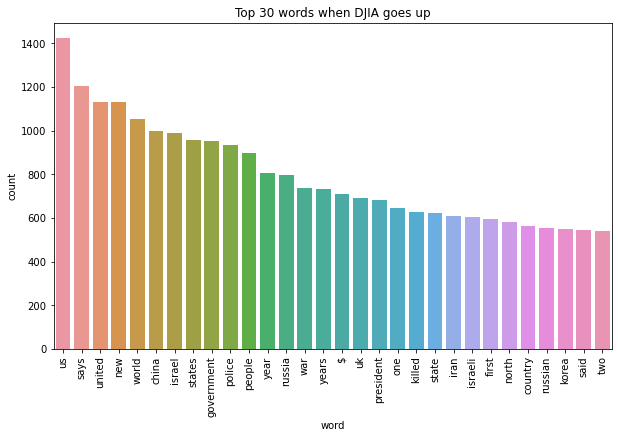

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=up_top_30_words, ax=ax)
plt.title('Top 30 words when DJIA goes up')
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

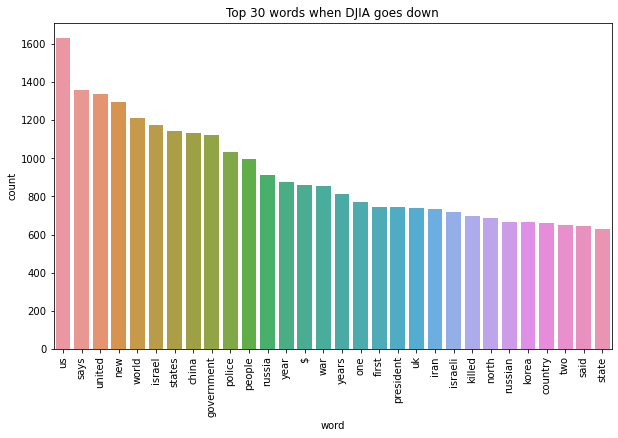

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=down_top_30_words, ax=ax)
plt.title('Top 30 words when DJIA goes down')
plt.xticks(rotation='vertical')

### Correlation Matrix

In [31]:
def corr_sentiment(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    return sentiment_dict['neg']*100, sentiment_dict['neu']*100, sentiment_dict['pos']*100

In [32]:
newsdata_corr = newsdata2[['Date', 'cleanNews']]
newsdata_corr['Negative'] = np.zeros(len(newsdata_corr))
newsdata_corr['Neutral'] = np.zeros(len(newsdata_corr))
newsdata_corr['Positive'] = np.zeros(len(newsdata_corr))
newsdata_corr.head()

<ipython-input-32-8dd7357c9b33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsdata_corr['Negative'] = np.zeros(len(newsdata_corr))
<ipython-input-32-8dd7357c9b33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsdata_corr['Neutral'] = np.zeros(len(newsdata_corr))


Date                                          cleanNews  Negative  \
0  2008-06-08  nim chimpsky tragedy chimp thought boy proved ...       0.0   
1  2008-06-09  united states quits human rights council penta...       0.0   
2  2008-06-10  oil shortage myth says industry insider israel...       0.0   
3  2008-06-11  bbc uncovers lost iraq billions war criminal g...       0.0   
4  2008-06-12  us attack pakistan last night pakistan fury de...       0.0   

   Neutral  Positive  
0      0.0       0.0  
1      0.0       0.0  
2      0.0       0.0  
3      0.0       0.0  
4      0.0       0.0

In [33]:
for i in range(len(newsdata_corr)):
    news = newsdata_corr['cleanNews'][i]
    neg, neu, pos = corr_sentiment(news)
    newsdata_corr['Negative'][i] = neg
    newsdata_corr['Neutral'][i] = neu
    newsdata_corr['Positive'][i] = pos

<ipython-input-33-953c6447c25f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsdata_corr['Negative'][i] = neg
<ipython-input-33-953c6447c25f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsdata_corr['Neutral'][i] = neu
<ipython-input-33-953c6447c25f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsdata_corr['Positive'][i] = pos


In [34]:
combined_df2 = combined_df[['Date', 'High', 'Low', 'Volume', 'Adj Close', 'label']]

In [35]:
corr_df = newsdata_corr[['Date','Positive', 'Negative', 'Neutral']].merge(combined_df2, how='inner', on='Date', left_index=True)
# Check the shape and top 5 rows of the merged dataframe
print(corr_df.shape)
corr_df.head()

(1989, 9)


Date  Positive  Negative  Neutral          High           Low  \
0  2008-08-08       9.1      27.3     63.6  11759.959961  11388.040039   
1  2008-08-11      13.4      27.4     59.2  11867.110352  11675.530273   
2  2008-08-12      11.6      24.5     63.9  11782.349609  11601.519531   
3  2008-08-13      11.7      18.8     69.5  11633.780273  11453.339844   
4  2008-08-14      12.9      24.8     62.3  11718.280273  11450.889648   

      Volume     Adj Close  label  
0  212830000  11734.320312      0  
1  183190000  11782.349609      1  
2  173590000  11642.469727      1  
3  182550000  11532.959961      0  
4  159790000  11615.929688      0

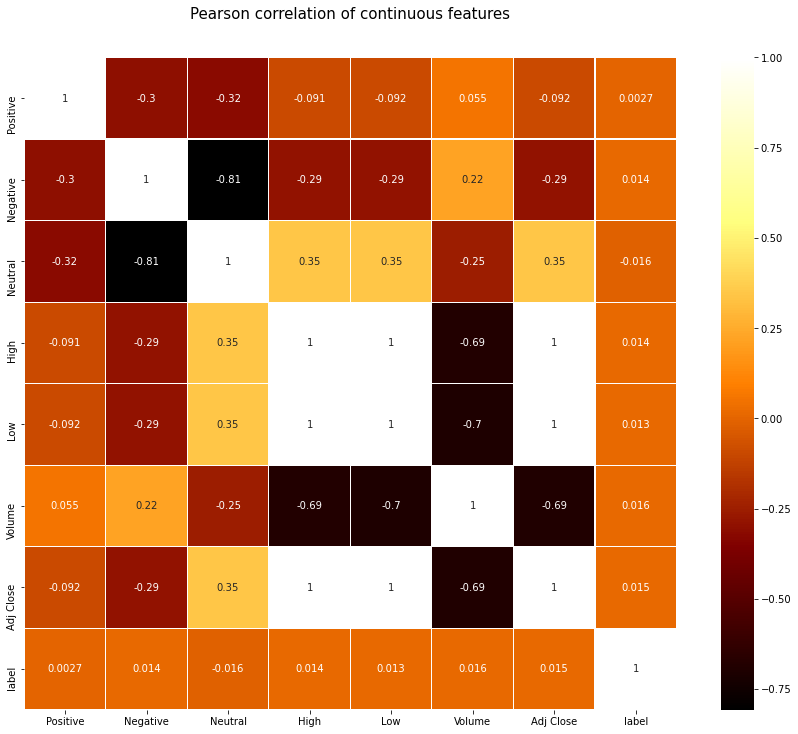

In [36]:
colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(corr_df.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

# Data Preprocessing 

In [37]:
from nltk.stem import WordNetLemmatizer
stop_words_en = set(nltk.corpus.stopwords.words('english'))
stop_words_en.add("b")

class CustomTokenizer:
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        self.tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
        
    def _lem(self, token):
        if (token in stop_words_en):
            return token  # Solves error "UserWarning: Your stop_words may be inconsistent with your preprocessing."
        return self.wnl.lemmatize(token)
    
    def __call__(self, doc):
        return [self._lem(t) for t in self.tokenizer.tokenize(doc)]

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=CustomTokenizer(), stop_words=stop_words_en, lowercase=True, min_df=0.0075,  max_df=0.05, ngram_range=(2,2))

features = vectorizer.fit_transform(combined_df['cleanNews'].tolist())

In [39]:
feature_names = vectorizer.get_feature_names()
print(feature_names[50:100])

features2 = pd.DataFrame(features.todense(), columns = feature_names)

features2.head()

['25 year', '3 000', '3 5', '3 billion', '3 day', '3 million', '3 year', '30 million', '30 year', '300 million', '4 000', '4 5', '4 billion', '4 day', '4 million', '4 year', '40 percent', '40 year', '400 year', '48 hour', '5 000', '5 billion', '5 million', '5 year', '50 million', '50 year', '500 year', '6 000', '6 billion', '6 million', '6 month', '6 year', '60 year', '7 000', '7 7', '7 billion', '7 year', '70 percent', '70 year', '8 000', '8 billion', '8 million', '8 year', '9 11', '9 year', '90 percent', 'abc news', 'abuse scandal', 'according new', 'according report']


000 people  000 year  1 2  1 200  1 3  1 4  1 5  1 500  1 6  1 billion  \
0           0         0    1      0    0    0    0      0    0          0   
1           0         0    0      0    0    0    0      0    0          0   
2           0         0    0      0    0    0    0      0    0          0   
3           0         0    0      0    0    0    0      0    0          0   
4           0         0    0      0    0    0    0      0    0          0   

   ...  year sentence  year since  year united  year world  york time  \
0  ...              0           0            0           0          0   
1  ...              0           0            0           0          0   
2  ...              0           0            0           0          0   
3  ...              0           0            0           0          0   
4  ...              0           0            0           1          0   

   young girl  young men  young people  young woman  zika virus  
0           0          0             0            0           0  
1           0          0             0            0           0  
2           0          0             0            0           0  
3           0          0             0            0           0  
4           0          0             0            0           0  

[5 rows x 1314 columns]

In [40]:
from collections import defaultdict

up_unigrams = defaultdict(int)
down_unigrams = defaultdict(int)

for word in feature_names:
    up_unigrams[word] += np.sum(features2[combined_df['label']==1][word])
    down_unigrams[word] += np.sum(features2[combined_df['label']==0][word])
        
df_up_unigrams = pd.DataFrame(sorted(up_unigrams.items(), key=lambda x: x[1])[::-1])
df_down_unigrams = pd.DataFrame(sorted(down_unigrams.items(), key=lambda x: x[1])[::-1])
df_up_unigrams.head()

0   1
0    world cup  68
1    bin laden  56
2    oil spill  53
3      jong un  53
4  fossil fuel  52

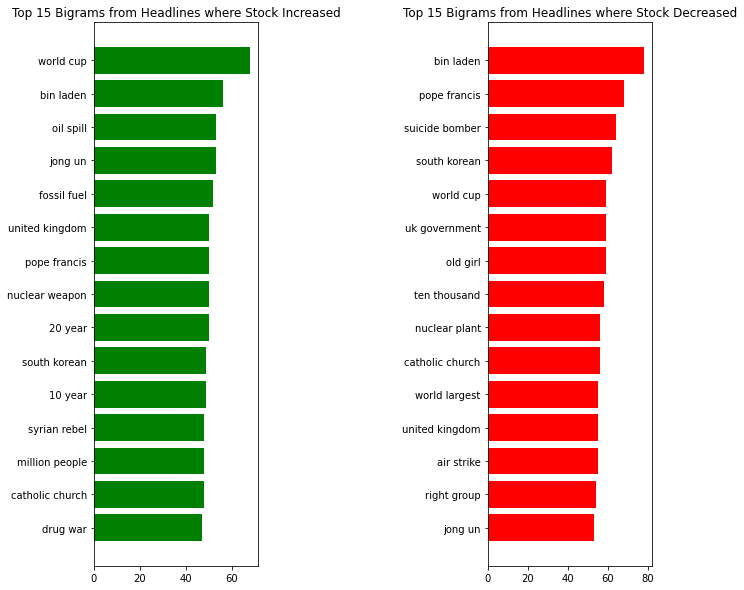

In [41]:
plt.figure(figsize=(10,10))
plt.title('Hi')
plt.subplot(1,3,1).set_title("Top 15 Bigrams from Headlines where Stock Increased")
plt.barh(df_up_unigrams.loc[:14, 0], df_up_unigrams.loc[:14, 1], color="green")
plt.gca().invert_yaxis()

plt.subplot(1,3,3).set_title("Top 15 Bigrams from Headlines where Stock Decreased")
plt.barh(df_down_unigrams.loc[:14, 0], df_down_unigrams.loc[:14, 1], color="red")
plt.gca().invert_yaxis()
plt.show()

In [42]:
#wordcloud
df = pd.read_csv('Combined_News_DJIA.csv')
df['Combined']=df.iloc[:,2:27].apply(lambda row: ''.join(str(row.values)), axis=1)

In [43]:
def to_words(content):
    letters_only = re.sub("[^a-zA-Z]", " ", content) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [44]:
non_decrease = df[df['Label']==1]
decrease = df[df['Label']==0]
print(len(non_decrease)/len(df))

0.5354449472096531


In [45]:
non_decrease_word=[]
decrease_word=[]
for each in non_decrease['Combined']:
    non_decrease_word.append(to_words(each))

for each in decrease['Combined']:
    decrease_word.append(to_words(each))

In [46]:
wordcloud1 = WordCloud(background_color='white',
                      width=3000,
                      height=3000
                     ).generate(decrease_word[0])

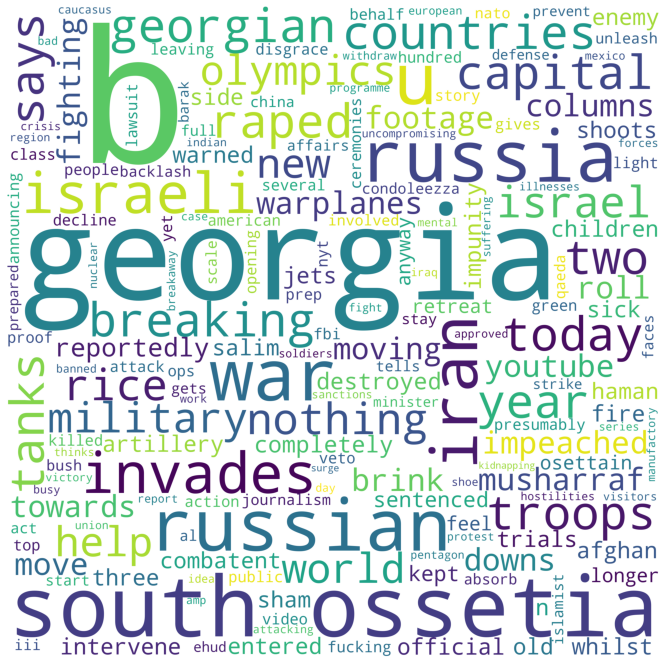

In [47]:
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [48]:
wordcloud2 = WordCloud(background_color='yellow',
                      width=3000,
                      height=3000
                     ).generate(non_decrease_word[0])

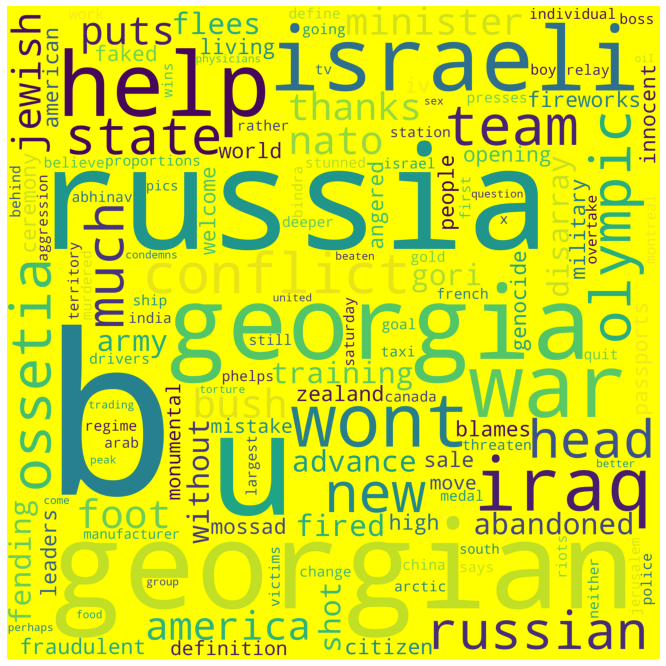

In [49]:
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [50]:
## Looking at top 25 news 

top_25 = combined_df

In [51]:
## Looking at top 5 news 
top_5 = pd.read_csv('Combined_News_DJIA.csv')
top_5['top5']=top_5.iloc[:,2:6].apply(lambda row: ''.join(str(row.values)), axis=1)

top_5['top5']=top_5['top5'].replace('b\"|b\'|\\\\|\\\"', '', regex=True)

cleanheadlinesall_top5 = []
for i in range(len(top_5['top5'])):
    cleanheadlinesall_top5.append(clean_text(top_5.iloc[i]['top5'],remove_stopwords = True))
    
top_5['cleanNews_no_stopwords']=cleanheadlinesall_top5

In [52]:
## Looking at top 10 news 
top_10 = pd.read_csv('Combined_News_DJIA.csv')
top_10['top10']=top_10.iloc[:,2:11].apply(lambda row: ''.join(str(row.values)), axis=1)

top_10['top10']=top_10['top10'].replace('b\"|b\'|\\\\|\\\"', '', regex=True)

cleanheadlinesall_top10 = []
for i in range(len(top_10['top10'])):
    cleanheadlinesall_top10.append(clean_text(top_10.iloc[i]['top10'],remove_stopwords = True))
    
top_10['cleanNews_no_stopwords']=cleanheadlinesall_top10

In [53]:
from datetime import datetime

## Count Vectorizer
def count_Vectorizer(x_train,x_test):
    count_vectorizer = CountVectorizer(tokenizer=CustomTokenizer(), stop_words=stop_words_en,
                                       lowercase=True,  ngram_range=(2,2))
    
    x_train = count_vectorizer.fit_transform(x_train)
    x_test = count_vectorizer.transform(x_test)
    
    return x_train,x_test

## Returning top 5,10,25 news
def top_news(n):
    #global x_train
    #global x_test
    #global y_train
    #global y_test
    comparison_date1 = datetime(2014,12,4)
    comparison_date2 = datetime(2014,12,3)
    top_25.Date = pd.to_datetime(top_25.Date)
    top_10.Date = pd.to_datetime(top_10.Date)
    top_5.Date = pd.to_datetime(top_5.Date)
    
       
    if n == 2:
        train = top_25[top_25['Date'] < comparison_date1]
        test = top_25[top_25['Date'] > comparison_date2]
        x_train = train['cleanNews_no_stopwords']
        y_train = train['label']
        x_test = test['cleanNews_no_stopwords']
        y_test = test['label']
    
    
    elif  n == 1:
        train = top_10[top_10['Date'] < comparison_date1]
        test = top_10[top_10['Date'] > comparison_date2]
        x_train = train['cleanNews_no_stopwords']
        y_train = train['Label']
        x_test = test['cleanNews_no_stopwords']
        y_test = test['Label']
    
    elif n == 0:
        train = top_5[top_5['Date'] < comparison_date1]
        test = top_5[top_5['Date'] > comparison_date2]
        x_train = train['cleanNews_no_stopwords']
        y_train = train['Label']
        x_test = test['cleanNews_no_stopwords']
        y_test = test['Label']
        
    return x_train,y_train,x_test,y_test

###  Logistic Regression 

In [56]:
# Logistic Regression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve,auc,precision_score,recall_score,f1_score
from sklearn.model_selection import learning_curve,GridSearchCV

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=101)

for i in range(3):
    x_train,y_train,x_test,y_test = top_news(i)
    
    traindataset,test_dataset = count_Vectorizer(x_train,x_test)
        
    return_news = ""
    if i == 2:
        return_news = " Top 25 News "
    elif i == 1:
        return_news = " Top 10 News "
    elif i == 0:
        return_news = " Top 5 News "
        
    lg.fit(traindataset,y_train)
    predlg = lg.predict(test_dataset )
    print("Confusion Matrix for Logistic Regression(Using Count_Vectorizer),for" + return_news)
    print(confusion_matrix(y_test,predlg))
    print("Accuracy:",round(accuracy_score(y_test,predlg),3))
    print("Precision Score:",round(precision_score(y_test,predlg),3))
    print("F1 Score:",round(f1_score(y_test,predlg),3))
    print("Recall Score:",round(recall_score(y_test,predlg),3))
    print("Classification Report:",classification_report(y_test,predlg))
        
        
        

Confusion Matrix for Logistic Regression(Using Count_Vectorizer),for Top 5 News 
[[ 32 164]
 [ 34 167]]
Accuracy: 0.501
Precision Score: 0.505
F1 Score: 0.628
Recall Score: 0.831
Classification Report:               precision    recall  f1-score   support

           0       0.48      0.16      0.24       196
           1       0.50      0.83      0.63       201

    accuracy                           0.50       397
   macro avg       0.49      0.50      0.44       397
weighted avg       0.49      0.50      0.44       397

Confusion Matrix for Logistic Regression(Using Count_Vectorizer),for Top 10 News 
[[ 51 145]
 [ 47 154]]
Accuracy: 0.516
Precision Score: 0.515
F1 Score: 0.616
Recall Score: 0.766
Classification Report:               precision    recall  f1-score   support

           0       0.52      0.26      0.35       196
           1       0.52      0.77      0.62       201

    accuracy                           0.52       397
   macro avg       0.52      0.51      0.48       

### Support Vector Machine

In [68]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101,probability=True)

for i in range(3):
    x_train,y_train,x_test,y_test = top_news(i)
    traindataset,test_dataset = count_Vectorizer(x_train,x_test)
        
    return_news = ""
    if i == 2:
        return_news = " Top 25 News "
    elif i == 1:
        return_news = " Top 10 News "
    elif i == 0:
        return_news = " Top 5 News "
        
    svm.fit(traindataset,y_train)
    predsvm = svm.predict(test_dataset )
    print("Confusion Matrix for SVM(Using Count_Vectorizer),for" + return_news)
    print("Accuracy:",round(accuracy_score(y_test,predsvm),3))
    print("Precision Score:",round(precision_score(y_test,predsvm),3))
    print("F1 Score:",round(f1_score(y_test,predsvm),3))
    print("Recall Score:",round(recall_score(y_test,predsvm),3))
    print("Classification Report:",classification_report(y_test,predsvm))
        
    

Confusion Matrix for SVM(Using Count_Vectorizer),for Top 5 News 
Accuracy: 0.506
Precision Score: 0.506
F1 Score: 0.672
Recall Score: 1.0
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.51      1.00      0.67       201

    accuracy                           0.51       397
   macro avg       0.25      0.50      0.34       397
weighted avg       0.26      0.51      0.34       397



C:\Users\ZQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix for SVM(Using Count_Vectorizer),for Top 10 News 
Accuracy: 0.506
Precision Score: 0.506
F1 Score: 0.672
Recall Score: 1.0
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.51      1.00      0.67       201

    accuracy                           0.51       397
   macro avg       0.25      0.50      0.34       397
weighted avg       0.26      0.51      0.34       397



C:\Users\ZQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix for SVM(Using Count_Vectorizer),for Top 25 News 
Accuracy: 0.509
Precision Score: 0.0
F1 Score: 0.0
Recall Score: 0.0
Classification Report:               precision    recall  f1-score   support

           0       0.51      1.00      0.67       202
           1       0.00      0.00      0.00       195

    accuracy                           0.51       397
   macro avg       0.25      0.50      0.34       397
weighted avg       0.26      0.51      0.34       397



C:\Users\ZQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ZQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes Classifier

In [67]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

for i in range(3):
    x_train,y_train,x_test,y_test = top_news(i)
    traindataset,test_dataset = count_Vectorizer(x_train,x_test)
        
    return_news = ""
    if i == 2:
        return_news = " Top 25 News "
    elif i == 1:
        return_news = " Top 10 News "
    elif i == 0:
        return_news = " Top 5 News "
        
    mnb.fit(traindataset,y_train)
    predmnb = mnb.predict(test_dataset )
    print("Confusion Matrix for MNB(Using Count_Vectorizer),for" + return_news)
    print("Accuracy:",round(accuracy_score(y_test,predmnb),3))
    print("Precision Score:",round(precision_score(y_test,predmnb),3))
    print("F1 Score:",round(f1_score(y_test,predmnb),3))
    print("Recall Score:",round(recall_score(y_test,predmnb),3))
    print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for MNB(Using Count_Vectorizer),for Top 5 News 
Accuracy: 0.474
Precision Score: 0.483
F1 Score: 0.526
Recall Score: 0.577
Classification Report:               precision    recall  f1-score   support

           0       0.46      0.37      0.41       196
           1       0.48      0.58      0.53       201

    accuracy                           0.47       397
   macro avg       0.47      0.47      0.47       397
weighted avg       0.47      0.47      0.47       397

Confusion Matrix for MNB(Using Count_Vectorizer),for Top 10 News 
Accuracy: 0.476
Precision Score: 0.486
F1 Score: 0.532
Recall Score: 0.587
Classification Report:               precision    recall  f1-score   support

           0       0.46      0.36      0.41       196
           1       0.49      0.59      0.53       201

    accuracy                           0.48       397
   macro avg       0.47      0.47      0.47       397
weighted avg       0.47      0.48      0.47       397

Confusion Matrix fo

In [54]:
top_25['Date'] = pd.to_datetime(top_25['Date'])

train = top_25[top_25['Date'] <= '20141203']
test = top_25[top_25['Date'] > '20141203']
x_train = train['cleanNews_no_stopwords']
y_train = train['label']
x_test = test['cleanNews_no_stopwords']
y_test = test['label']
traindataset,test_dataset = count_Vectorizer(x_train,x_test)

### Random Forest Classifier

In [66]:
## Random Forest without hyper parameter tuning
from sklearn.ensemble import RandomForestClassifier

traindataset,test_dataset = count_Vectorizer(x_train,x_test)

randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state =101)
randomclassifier.fit(traindataset,y_train)

predictions = randomclassifier.predict(test_dataset)
print("Confusion Matrix for Random Forest")
print(confusion_matrix(y_test,predictions))
print("Accuracy:",round(accuracy_score(y_test,predictions),3))
print("Precision Score:",round(precision_score(y_test,predictions),3))
print("F1 Score:",round(f1_score(y_test,predictions),3))
print("Recall Score:",round(recall_score(y_test,predictions),3))
print("Classification Report:",classification_report(y_test,predictions))

Confusion Matrix for Random Forest
[[202   0]
 [194   1]]
Accuracy: 0.511
Precision Score: 1.0
F1 Score: 0.01
Recall Score: 0.005
Classification Report:               precision    recall  f1-score   support

           0       0.51      1.00      0.68       202
           1       1.00      0.01      0.01       195

    accuracy                           0.51       397
   macro avg       0.76      0.50      0.34       397
weighted avg       0.75      0.51      0.35       397



In [62]:
## Random Forest with hyperparameter tuning

def performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))


rf = RandomForestClassifier(random_state = 101)
param_grid =  {'n_estimators': [100,200,300,400],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [None,15, 20],
                                  'max_features': ['auto', 10],
                                  'min_samples_leaf': [1,2,5],
                                  'min_samples_split': [2,3,5]}

clf_rf = GridSearchCV(rf,param_grid = param_grid, cv=5 , verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(traindataset,train['label'])
performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed: 47.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 49.5min finished


Random Forest
Best Score: 0.5471146073618423
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [63]:
## Best parameters using Hyper parameter tuning 
best_rf = best_clf_rf.best_estimator_

## Using CountfVectorizer
traindataset,test_dataset = count_Vectorizer(x_train,x_test)

best_rf.fit(traindataset,train['label'])
predictions = best_rf.predict(test_dataset)

print("Confusion Matrix for Random Forest Classifier(After hyperparameter tuning):")
print(confusion_matrix(test['label'],predictions ))
print("Accuracy:",round(accuracy_score(y_test,predictions),3))
print("Precision Score:",round(precision_score(y_test,predictions),3))
print("F1 Score:",round(f1_score(y_test,predictions),3))
print("Recall Score:",round(recall_score(y_test,predictions),3))
print("Classification Report:",classification_report(y_test,predictions))

Confusion Matrix for Random Forest Classifier(After hyperparameter tuning):
[[201   1]
 [192   3]]
Accuracy: 0.514
Precision Score: 0.75
F1 Score: 0.03
Recall Score: 0.015
Classification Report:               precision    recall  f1-score   support

           0       0.51      1.00      0.68       202
           1       0.75      0.02      0.03       195

    accuracy                           0.51       397
   macro avg       0.63      0.51      0.35       397
weighted avg       0.63      0.51      0.36       397



### XGBoost

In [57]:
## XGBoost without hyperparameter tuning
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state =101)
xgb.fit(traindataset,train['label'])
predictions = xgb.predict(test_dataset)
score=accuracy_score(test['label'],predictions)

print("Confusion Matrix for XGB(Without hyperparameter tuning):")
print(confusion_matrix(test['label'],predictions ))
print("Accuracy:",round(accuracy_score(y_test,predictions),3))
print("Precision Score:",round(precision_score(y_test,predictions),3))
print("F1 Score:",round(f1_score(y_test,predictions),3))
print("Recall Score:",round(recall_score(y_test,predictions),3))
print("Classification Report:",classification_report(y_test,predictions))

Confusion Matrix for XGB(Without hyperparameter tuning):
[[122  80]
 [132  63]]
Accuracy: 0.466
Precision Score: 0.441
F1 Score: 0.373
Recall Score: 0.323
Classification Report:               precision    recall  f1-score   support

           0       0.48      0.60      0.54       202
           1       0.44      0.32      0.37       195

    accuracy                           0.47       397
   macro avg       0.46      0.46      0.45       397
weighted avg       0.46      0.47      0.46       397



In [73]:
## XGBoost with hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

traindataset,test_dataset = count_Vectorizer(x_train,x_test)

xgb = XGBClassifier(random_state =101)
param_grid = {
    'n_estimators': [500,550,600,650],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [1,2,3,4,5],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65,0.9],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(traindataset,train['label'])
performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.1min finished


XGB
Best Score: 0.5251335738648686
Best Parameters: {'subsample': 0.55, 'sampling_method': 'uniform', 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 550, 'min_child_weight': 0.01, 'max_depth': 5, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.75}


In [66]:
best_clf_xgb = best_clf_xgb.best_estimator_

best_clf_xgb.fit(traindataset,train['label'])
predictions = best_clf_xgb.predict(test_dataset)

print("Confusion Matrix for XGB(After Hyperparameter tuning):")
print(confusion_matrix(test['label'],predictions ))
print("Accuracy:",round(accuracy_score(y_test,predictions),3))
print("Precision Score:",round(precision_score(y_test,predictions),3))
print("F1 Score:",round(f1_score(y_test,predictions),3))
print("Recall Score:",round(recall_score(y_test,predictions),3))
print("Classification Report:",classification_report(y_test,predictions))

Confusion Matrix for XGB(Using CountVectorizer):
[[201   1]
 [192   3]]
Accuracy: 0.514
Precision Score: 0.75
F1 Score: 0.03
Recall Score: 0.015
Classification Report:               precision    recall  f1-score   support

           0       0.51      1.00      0.68       202
           1       0.75      0.02      0.03       195

    accuracy                           0.51       397
   macro avg       0.63      0.51      0.35       397
weighted avg       0.63      0.51      0.36       397



### Gradient Boosting

In [63]:
## Gradient Boosting without hyperparameter tuning

from sklearn.ensemble import GradientBoostingClassifier

traindataset,test_dataset = count_Vectorizer(x_train,x_test)

gbi = GradientBoostingClassifier(learning_rate=0.05,max_depth=10,max_features=1.0,random_state=101)
gbi.fit(traindataset,y_train)
predgbi = gbi.predict(test_dataset)

print("Confusion Matrix for Gradient Boosting(Without hyperparameter tuning):")
print(confusion_matrix(test['label'],predgbi))
print("Accuracy:",round(accuracy_score(y_test,predgbi),3))
print("Precision Score:",round(precision_score(y_test,predgbi),3))
print("F1 Score:",round(f1_score(y_test,predgbi),3))
print("Recall Score:",round(recall_score(y_test,predgbi),3))
print("Classification Report:",classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting(Without hyperparameter tuning):
[[139  63]
 [149  46]]
Accuracy: 0.466
Precision Score: 0.422
F1 Score: 0.303
Recall Score: 0.236
Classification Report:               precision    recall  f1-score   support

           0       0.48      0.69      0.57       202
           1       0.42      0.24      0.30       195

    accuracy                           0.47       397
   macro avg       0.45      0.46      0.43       397
weighted avg       0.45      0.47      0.44       397



In [64]:
# Gradient Boosting with hyperparameter tuning

gbi = GradientBoostingClassifier(random_state = 101)


param_grid = {
    'learning_rate': [0.01,0.05,0.1,0.5,1],
    'max_depth': [1,5,10,15,20],
    'max_features': [0.1,0.5,1.0]
}


grid = GridSearchCV(estimator = gbi,param_grid=param_grid,scoring='roc_auc',verbose=1,n_jobs=-1)
grid_result = grid.fit(traindataset, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed: 89.3min finished


In [72]:
predgrid = grid.predict(test_dataset)

print("Confusion Matrix for Gradient Boosting(Using GridCV):")
print(confusion_matrix(test['label'],predgrid))
print("Accuracy:",round(accuracy_score(y_test,predgrid),3))
print("Precision Score:",round(precision_score(y_test,predgrid),3))
print("F1 Score:",round(f1_score(y_test,predgrid),3))
print("Recall Score:",round(recall_score(y_test,predgrid),3))
print("Classification Report:",classification_report(y_test,predgrid))

Confusion Matrix for Gradient Boosting(Using GridCV):
[[157  45]
 [160  35]]
Accuracy: 0.484
Precision Score: 0.438
F1 Score: 0.255
Recall Score: 0.179
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.78      0.61       202
           1       0.44      0.18      0.25       195

    accuracy                           0.48       397
   macro avg       0.47      0.48      0.43       397
weighted avg       0.47      0.48      0.43       397



[22:05:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




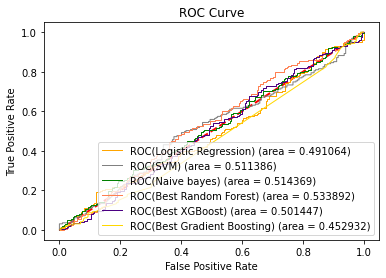

In [78]:
from sklearn.metrics import plot_roc_curve

best_rf = RandomForestClassifier(n_estimators=100,criterion='gini', bootstrap = "false" , max_depth =20, 
                                 max_features = "auto" , min_samples_leaf = 2,min_samples_split = 2,
                                 random_state =101)
best_clf_xgb = XGBClassifier(random_state =101,subsample = 0.55, sampling_method  = "uniform", reg_lamda = 5,
                    reg_alpha = 1 , n_estimators = 650 , min_child_weight = 0.01 , max_depth = 1 , 
                    learning_rate =0.5 , gamma = 1 , colsample_bytree = 0.75)



color = ['blue', 'orange', 'red', 'green', 'coral',
             'grey', 'indigo', 'gold', 'lime', 'olive',
             'pink', 'navy', 'magenta', 'yellow', 'tomato',
             'turquoise', 'yellowgreen', 'maroon', 'lightblue']

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

lg.fit(traindataset,y_train)
y_predict_proba = lg.predict_proba(test_dataset).tolist()
probabilities = np.array(y_predict_proba)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=color[1], lw=1, label='ROC(Logistic Regression) (area = %f)' % roc_auc)

svm.fit(traindataset,y_train)
y_predict_proba = svm.predict_proba(test_dataset).tolist()
probabilities = np.array(y_predict_proba)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=color[5], lw=1, label='ROC(SVM) (area = %f)' % roc_auc)


mnb.fit(traindataset,y_train)
y_predict_proba = mnb.predict_proba(test_dataset).tolist()
probabilities = np.array(y_predict_proba)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=color[3], lw=1, label='ROC(Naive bayes) (area = %f)' % roc_auc)

best_rf.fit(traindataset,y_train)
y_predict_proba = best_rf.predict_proba(test_dataset).tolist()
probabilities = np.array(y_predict_proba)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=color[4], lw=1, label='ROC(Best Random Forest) (area = %f)' % roc_auc)

best_clf_xgb.fit(traindataset,y_train)
y_predict_proba = best_clf_xgb.predict_proba(test_dataset).tolist()
probabilities = np.array(y_predict_proba)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=color[6], lw=1, label='ROC(Best XGBoost) (area = %f)' % roc_auc)

grid = grid.best_estimator_
grid.fit(traindataset,y_train)
y_predict_proba = grid.predict_proba(test_dataset).tolist()
probabilities = np.array(y_predict_proba)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=color[7], lw=1, label='ROC(Best Gradient Boosting) (area = %f)' % roc_auc)



plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Neural Network (ANN)

In [2]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

from matplotlib import pyplot as plt

from datetime import datetime

top_25 = pd.read_csv('Combined_News_DJIA.csv')
top_25['headlines']=top_25.iloc[:,2:26].replace('b\"|b\'|\\\\|\\\"', '', regex=True).apply(lambda x: ". ".join(x.dropna().astype(str)),axis=1)


split_date = datetime(2014,12,4)
top_25.Date = pd.to_datetime(top_25.Date)
len_train = top_25.loc[top_25.Date < split_date].shape[0]

def train_test_split_date2(df,len_train):
    train = df.loc[:len_train-1,]
    test = df.loc[len_train:,]
    return train,test
train, test = train_test_split_date2(top_25, len_train)

nltk.download('stopwords',quiet=True,raise_on_error = True)
stop_words_en = set(nltk.corpus.stopwords.words('english'))
stop_words_en.add('s')
stop_words_en.add('u')
stop_words_en.add('t')


class CustomTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        self.tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
        
    def _lem(self, token):
        if (token in stop_words_en):
            return token  # Solves error "UserWarning: Your stop_words may be inconsistent with your preprocessing."
        return self.wnl.lemmatize(token)
    
    def __call__(self, doc):
        return [self._lem(t) for t in self.tokenizer.tokenize(doc)]

vectorizer = CountVectorizer(tokenizer=CustomTokenizer(), stop_words=stop_words_en, lowercase=True, min_df=0.0075,  max_df=0.05, ngram_range=(2,2))

features_train = vectorizer.fit_transform(train['headlines'].tolist())
features_test = vectorizer.transform(test['headlines'].tolist())

feature_names = vectorizer.get_feature_names()

X_train = pd.DataFrame(features_train.todense(), columns = feature_names)
X_test = pd.DataFrame(features_test.todense(), columns = feature_names)


In [3]:
vectorizer = TfidfVectorizer(tokenizer=CustomTokenizer(), stop_words=stop_words_en, lowercase=True, min_df=0.0075,  max_df=0.05, ngram_range=(2,2))

features_train = vectorizer.fit_transform(train['headlines'].tolist())
features_test = vectorizer.transform(test['headlines'].tolist())

feature_names = vectorizer.get_feature_names()

X_train = pd.DataFrame(features_train.todense(), columns = feature_names)
X_test = pd.DataFrame(features_test.todense(), columns = feature_names)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 9928      
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 9,946
Trainable params: 9,946
Non-trainable params: 0
_________________________________________________________________
None


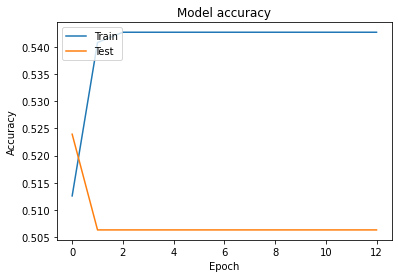

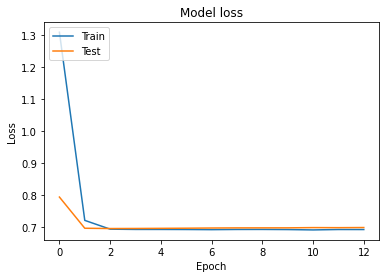

13/13 [==============================] - 0s 385us/step - loss: 0.6979 - accuracy: 0.5063
[0.6979080438613892, 0.50629723072052]


In [7]:
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras import Sequential, optimizers, regularizers

import numpy as np

scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.mean(X_train)
X_train -= mean
X_test -= mean

num_features = X_train.shape[1]

model = Sequential()
model.add(Dense(8,input_shape=(num_features,), activation='relu', kernel_regularizer = regularizers.l2(0.1)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Y_train = np_utils.to_categorical(train["Label"], 2)
Y_test = np_utils.to_categorical(test["Label"], 2)

history = model.fit(X_train, Y_train, batch_size=32, validation_data=(X_test, Y_test), epochs=50, verbose=0\
                   ,callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
    
score = model.evaluate(X_test, Y_test)
print(score)

 # Neural Network (CNN)

In [8]:
import nltk
class MyTokenizer():
    def __init__(self):
        self.tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
        self.lemmatizer = nltk.stem.WordNetLemmatizer()
        self.stop_words_en = set(nltk.corpus.stopwords.words('english'))
        self.stop_words_germ = set(nltk.corpus.stopwords.words('german'))
        self.stop_words = set()
        self.stop_words.add("b")
        
    def tokenize(self, headlines):
        # Tokenize
        tokens = [self.tokenizer.tokenize(article) for article in headlines]

        # Lemmatizer
        clean_tokens = []
        for words in tokens:
            clean_tokens.append([self.lemmatizer.lemmatize(word) for word in words])

        # Stop words
        final_tokens = []
        for words in clean_tokens:
            final_tokens.append([word.lower() for word in words if word.lower() not in self.stop_words_en and word.lower() not in self.stop_words_germ and word.lower() not in self.stop_words])
            
        return final_tokens

from gensim.models import Word2Vec

tokenizer = MyTokenizer()

headlines_train = train["headlines"]
headlines_test= test["headlines"]

tokens_train = tokenizer.tokenize(headlines_train)
tokens_test = tokenizer.tokenize(headlines_test)

model = Word2Vec(tokens_train, min_count=1,size= 50,workers=3, window =3, sg = 1)

word_vectors = model.wv
print("Number of word vectors: {}".format(len(word_vectors.vocab)))


Number of word vectors: 29304


Number of words: 20000
max_length: 200
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 200, 8)            160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 198, 250)          6250      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 250)               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 250)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                4016      
_________________________________________________________________
dropout_11 (Dr

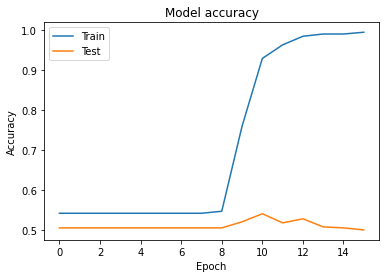

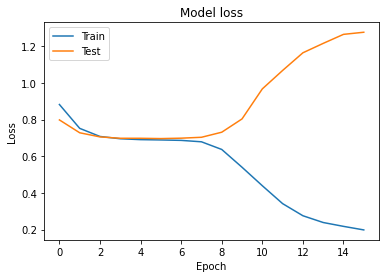

13/13 [==============================] - 0s 2ms/step - loss: 1.2763 - accuracy: 0.5013
Testing Accuracy is 50.1259446144104 
Loss is 1.2763333320617676


In [19]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.layers import Flatten, Dense, concatenate, Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import SGD

my_tokenizer = MyTokenizer()

headlines_train = train["headlines"]
headlines_test= test["headlines"]
tokens_train = my_tokenizer.tokenize(headlines_train)
tokens_test = my_tokenizer.tokenize(headlines_test)

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(train["headlines"])
        
vocab_size = 20000 #len(tokenizer.word_index) + 1
print('Number of words: ' + str(vocab_size))

X_train_tokens = tokenizer.texts_to_sequences(tokens_train)
X_test_tokens = tokenizer.texts_to_sequences(tokens_test)

max_length = 200
print('max_length: ' + str(max_length))

filters = 250
kernel_size = 3

X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')

y_train = train['Label']
y_test = test['Label']
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train_pad, Y_train, batch_size=32, epochs=50, verbose=0, validation_data=(X_test_pad, Y_test)\
                   ,callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(X_test_pad,Y_test)
print('Testing Accuracy is {} '.format(accuracy*100))
print('Loss is '+str(loss))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 200, 8)            160000    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 198, 250)          6250      
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 250)               0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 250)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 2008      
_________________________________________________________________
dropout_25 (Dropout)         (None, 8)               

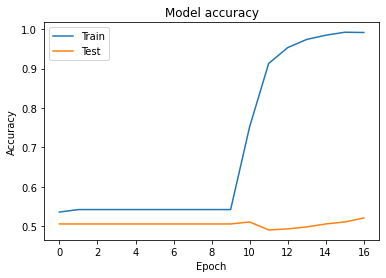

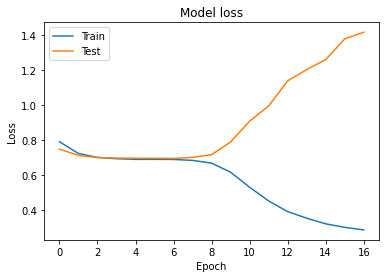

13/13 [==============================] - 0s 2ms/step - loss: 1.4185 - accuracy: 0.5214
Testing Accuracy is 52.14105844497681 
Loss is 1.418548822402954


In [26]:
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train_pad, Y_train, batch_size=32, epochs=50, verbose=0, validation_data=(X_test_pad, Y_test)\
                   ,callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(X_test_pad,Y_test)
print('Testing Accuracy is {} '.format(accuracy*100))
print('Loss is '+str(loss))

# Neural Network (LSTM)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 8)            160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 18        
Total params: 160,562
Trainable params: 160,562
Non-trainable params: 0
_________________________________________________________________
None


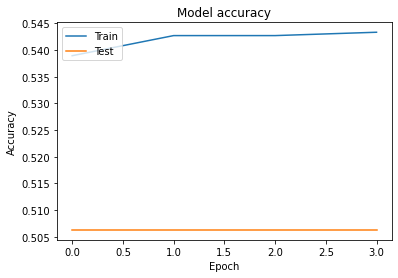

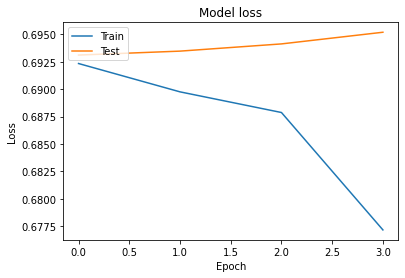

13/13 [==============================] - 0s 9ms/step - loss: 0.6952 - accuracy: 0.5063
Testing Accuracy is 50.629723072052 


In [11]:
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(LSTM(8, dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train_pad, Y_train, batch_size=32, epochs=100, verbose=0, validation_data=(X_test_pad, Y_test)\
                   ,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(X_test_pad,Y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

Number of words: 20000
max_length: 200
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 8)            160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 18        
Total params: 160,562
Trainable params: 160,562
Non-trainable params: 0
_________________________________________________________________
None


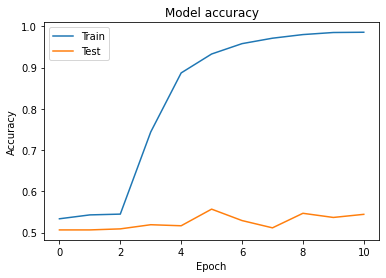

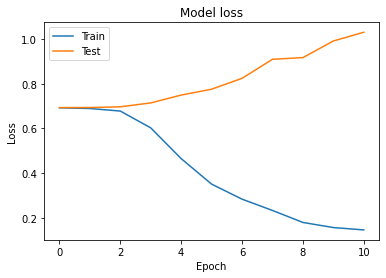

13/13 [==============================] - 0s 9ms/step - loss: 1.0301 - accuracy: 0.5441
Testing Accuracy is 54.408061504364014 


In [14]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.layers import Flatten, Dense, LSTM, GRU, SpatialDropout1D, Bidirectional, concatenate
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import SGD

my_tokenizer = MyTokenizer()

headlines_train = train["headlines"]
headlines_test= test["headlines"]
tokens_train = my_tokenizer.tokenize(headlines_train)
tokens_test = my_tokenizer.tokenize(headlines_test)

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(train["headlines"])
        
vocab_size = 20000 #len(tokenizer.word_index) + 1
print('Number of words: ' + str(vocab_size))

X_train_tokens = tokenizer.texts_to_sequences(tokens_train)
X_test_tokens = tokenizer.texts_to_sequences(tokens_test)

max_length = 200
print('max_length: ' + str(max_length))

X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')

y_train = train['Label']
y_test = test['Label']
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(LSTM(8, dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train_pad, Y_train, batch_size=32, epochs=100, verbose=0, validation_data=(X_test_pad, Y_test)\
                   ,callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(X_test_pad,Y_test)
print('Testing Accuracy is {} '.format(accuracy*100))